# Haensel AMS - Predicting Price

## Contents
* [Assignment](#Assignment)
* [Data Exploration](#Data-Exploration)
* [Question 1](#Question-1)
* [Question 2](#Question-2)
* [Question 3](#Question-3)
* [Question 4](#Question-4)

### Assignment 
The target variable is 'price'. You have 7 attributes and obviously we want you to build some initial ML model which predicts the prices.

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.
2. Fit some ML model(s) and explain briefly your choices.
3. Show with some X-validation the power of your model and comment the results.
4. Present us the results and the steps you have taken and also with some critical thinking and next steps.


## Data Exploration

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
data = pd.read_csv('sample.csv')
data.head(3)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00


In [108]:
data.isnull().sum()

loc1     0
loc2     0
para1    0
dow      0
para2    0
para3    0
para4    0
price    0
dtype: int64

We don't have any missing value(NaN). 

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [135]:
data.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


Our target variable is 'price'. This column is around 50.730000 and 5700.000000. The Mean is 433.733056.

In [111]:
data.corr()

,para1,para2,para3,para4,price
para1,1.000000,0.072025,0.010420,0.001663,0.074754
para2,0.072025,1.000000,0.006978,0.020806,0.552681
para3,0.010420,0.006978,1.000000,0.691237,0.355088
para4,0.001663,0.020806,0.691237,1.000000,0.514990
price,0.074754,0.552681,0.355088,0.514990,1.000000


<AxesSubplot:>

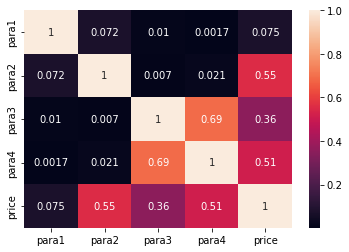

In [112]:
sns.heatmap(data.corr(), annot = True)

We observe a medium positive correlation between para2, para4, and price.Also, we observe a less than others positive correlation between para3 and price. However, almost no correlation between para1 and price.

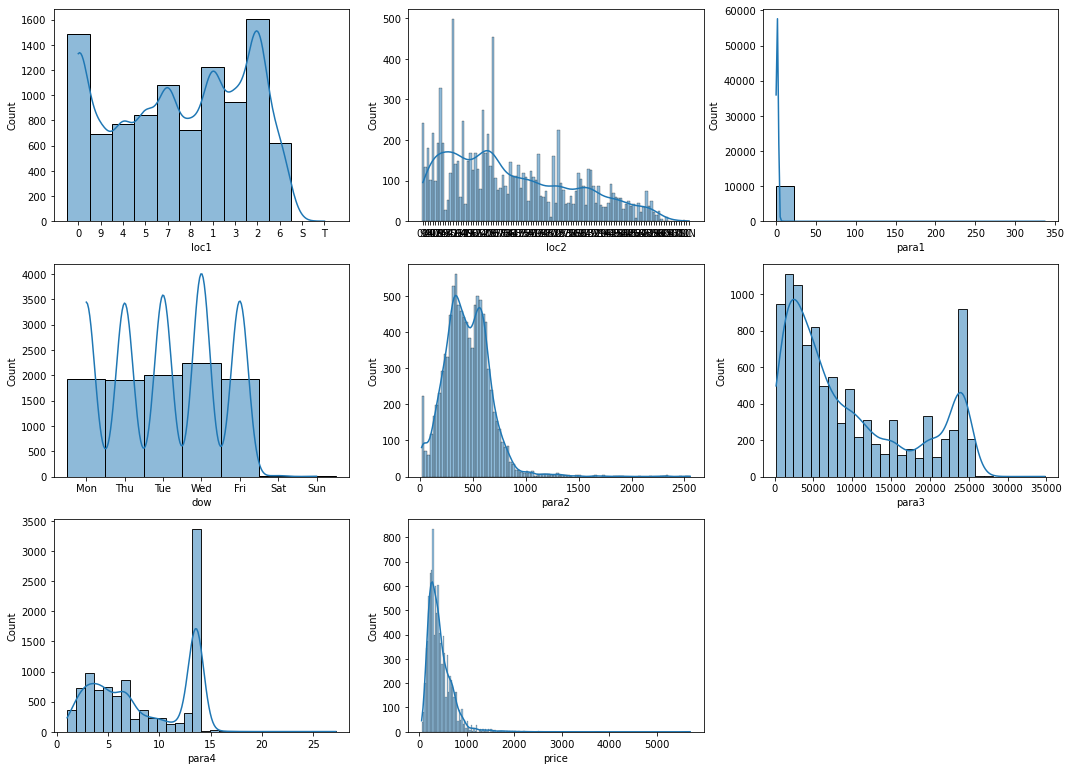

In [113]:
plt.figure(figsize = (18, 18))

# the enumerate() function is used to enumerate objects.

for i, col in enumerate(data):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data = data, x = col, ax = ax,kde = True)

<AxesSubplot:xlabel='para4'>

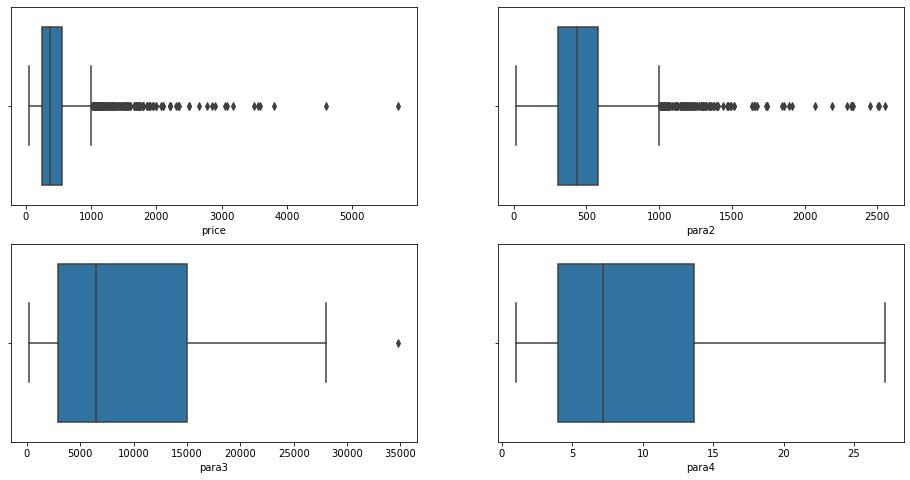

In [175]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(data = data, x = data['price'])

plt.subplot(2,2,2)
sns.boxplot(data = data, x = data['para2'])

plt.subplot(2,2,3)
sns.boxplot(data = data, x = data['para3'])

plt.subplot(2,2,4)
sns.boxplot(data = data, x = data['para4'])

In [150]:
percentile25 = data['price'].quantile(0.25)
percentile75 = data['price'].quantile(0.75)

print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  550.0
25th quartile:  250.0


In [138]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  300.0


In [151]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper Limit:  ' , upper_limit)
print('Lower Limit:  ' , lower_limit)

Upper Limit:   1000.0
Lower Limit:   -200.0


In [141]:
data[data['price'] > upper_limit]

,loc1,loc2,para1,dow,para2,para3,para4,price
9,1,17,4,Fri,1004,3135.0,13.2,1400.0
14,5,59,1,Wed,733,22410.0,13.6,2200.0
96,6,66,2,Tue,1148,16382.0,13.2,1500.0
201,1,14,1,Mon,614,8288.0,13.6,1400.0
205,0,08,2,Wed,1658,6500.0,13.6,1700.0
...,...,...,...,...,...,...,...,...
9854,2,23,1,Mon,963,24247.0,13.6,1200.0
9856,0,01,3,Fri,895,10000.0,13.6,1100.0
9857,3,38,2,Mon,1490,14000.0,7.0,1080.0
9859,3,39,3,Fri,837,9280.0,13.6,1450.0


In [142]:
data[data['price'] > upper_limit].count()

loc1     253
loc2     253
para1    253
dow      253
para2    253
para3    253
para4    253
price    253
dtype: int64

In [152]:
new_data = data[data['price'] < upper_limit]
new_data.shape

(9705, 8)

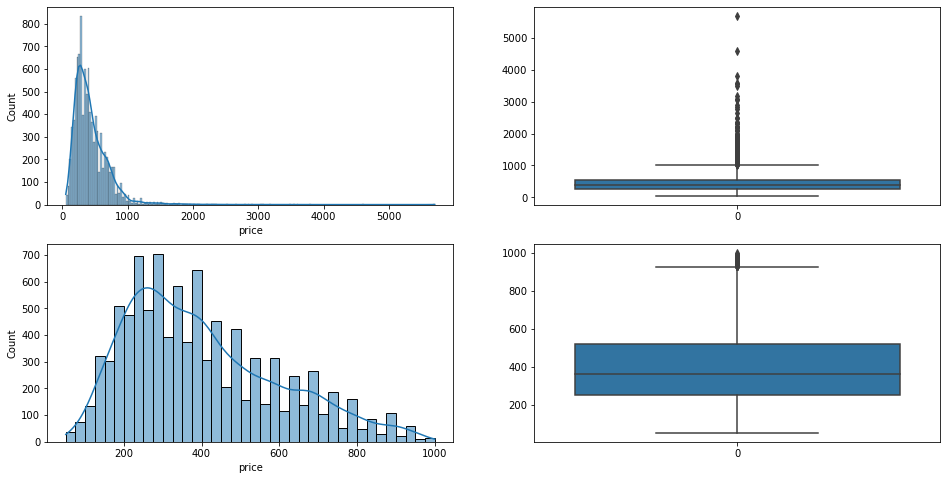

In [153]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['price'])

plt.subplot(2,2,3)
sns.histplot(new_data['price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data['price'])

plt.show()

<AxesSubplot:>

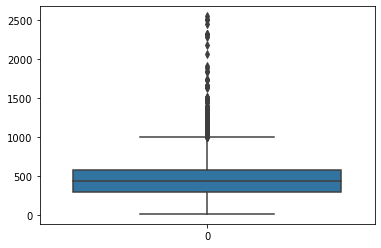

In [156]:
sns.boxplot(data = data['para2'])

In [164]:
percentile25_2 = new_data['para2'].quantile(0.25)
percentile75_2 = new_data['para2'].quantile(0.75)

print("75th quartile: ",percentile75_2)
print("25th quartile: ",percentile25_2)

75th quartile:  573.0
25th quartile:  298.0


In [165]:
iqr_2 = percentile75_2 - percentile25_2
print ("IQR: ",iqr_2)

IQR:  275.0


In [166]:
upper_limit_2 = percentile75_2 + 1.5 * iqr_2
lower_limit_2 = percentile25_2 - 1.5 * iqr_2

print('Upper Limit:  ' , upper_limit_2)
print('Lower Limit:  ' , lower_limit_2)

Upper Limit:   985.5
Lower Limit:   -114.5


In [167]:
new_data[new_data['para2'] > upper_limit_2].head()

,loc1,loc2,para1,dow,para2,para3,para4,price
383,2,21,2,Wed,1067,6429.0,5.2,540.00
540,0,02,4,Thu,1009,1650.0,13.6,900.00
635,8,88,3,Fri,1011,24810.0,13.6,980.00
991,0,04,2,Wed,1144,2520.0,2.4,693.33
1471,2,27,2,Wed,1038,3076.8,4.8,575.00


In [168]:
new_data[new_data['para2'] > upper_limit_2].count()

loc1     51
loc2     51
para1    51
dow      51
para2    51
para3    51
para4    51
price    51
dtype: int64

In [169]:
new_data_2 = new_data[new_data['para2'] < upper_limit_2]
new_data_2.shape

(9654, 8)

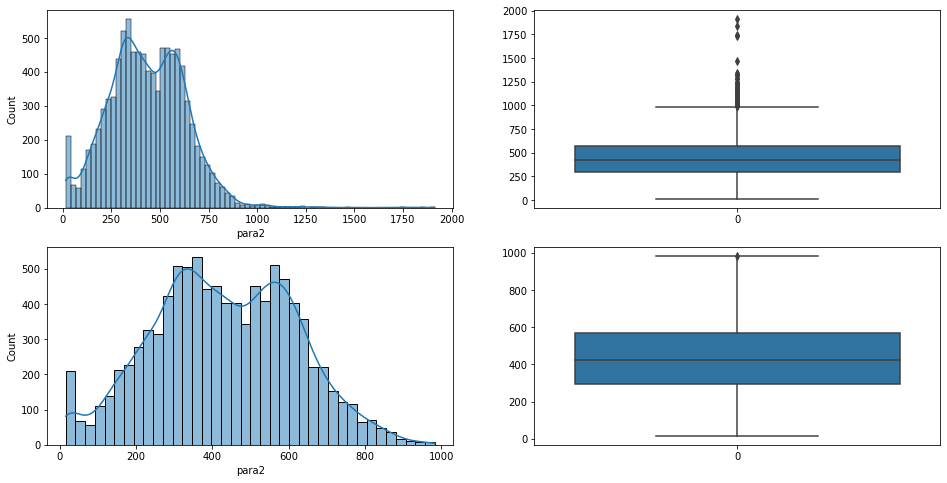

In [171]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(new_data['para2'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = new_data['para2'])

plt.subplot(2,2,3)
sns.histplot(new_data_2['para2'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data_2['para2'])

plt.show()

## Question 1

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.